In [4]:
import numpy as np
import pandas as pd
import scipy.io as sio
import sklearn.svm
import sklearn.model_selection    #select parameters
from sklearn.metrics import classification_report  #这个包是评价报告
import matplotlib.pyplot as plt  #加油！！！珍惜时间～～～

### 1. linear SVM with x1,x2 and change C

In [5]:
data_1=sio.loadmat('/Users/yangguangqiang/Music/career-2021/ML-startup/吴恩达/ML-homework-main/ex6-SVM/data/ex6data1.mat')
data_x=data_1['X']
data_y=data_1['y']
df_1=pd.DataFrame(data_x,columns=['X1','X2'])  #build a dataframe to record data
df_1['Y']=data_y
df_1.head()

,X1,X2,Y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


In [22]:
min(df_1['X1']), max(df_1['X1']), min(df_1['X2']), max(df_1['X2'])

(0.086405, 4.015, 1.6177, 4.6162)

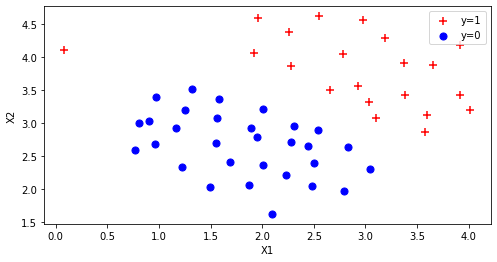

In [17]:
## visualize plot scatter
class_1=df_1[df_1["Y"]==1]
class_0=df_1[df_1["Y"]==0]

fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(class_1['X1'], class_1['X2'], label='y=1', s=50, marker='+', c='r')
ax.scatter(class_0['X1'], class_0['X2'], label='y=0', s=50, marker='o', c='b')
ax.legend(loc='best')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

In [28]:
## C=1
svm_1=sklearn.svm.LinearSVC(C=1, loss='hinge', max_iter=20000)
svm_1.fit(df_1[["X1","X2"]],df_1["Y"])
svm_1.score(df_1[["X1","X2"]],df_1["Y"])

0.9803921568627451

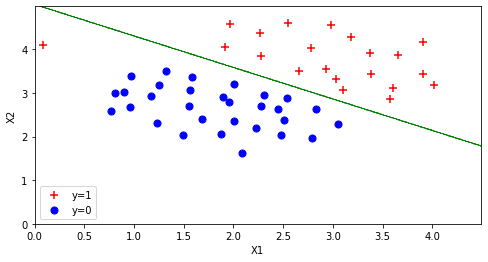

In [25]:
## add desicion boundary plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(class_1['X1'], class_1['X2'], label='y=1', s=50, marker='+', c='r')
ax.scatter(class_0['X1'], class_0['X2'], label='y=0', s=50, marker='o', c='b')
ax.legend(loc='lower left')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

x1 = np.arange(0, 4.5, 0.01)
x2 = np.arange(0, 5, 0.01)
x1, x2 = np.meshgrid(x1, x2) 
y_pred = np.array([svm_1.predict(np.vstack((a, b)).T) for (a, b) in zip(x1, x2)])  # ".predict"
plt.contour(x1, x2, y_pred, colors='g', linewidths=.5)    # 决策边界, 使用等高线表示

plt.show()

In [26]:
svm_1.decision_function(df_1[['X1', 'X2']])  #样本到分类超平面的距离

array([ 0.80282239,  0.38391331,  1.37749174,  0.52118066,  0.33343167,
        0.86872941,  0.68654074,  1.61122537,  0.83448689,  1.16712853,
        1.07325232,  0.229826  ,  0.33182059,  0.79580403,  0.31580663,
        1.27409826,  1.21021018,  1.        ,  0.56477089,  0.38991007,
       -0.43522762, -0.30879317, -0.68619968, -0.55395351, -0.33244449,
       -0.29376162, -0.44061496, -0.98390663, -0.68555355, -1.32841141,
       -1.00372451, -1.4922602 , -0.61136486, -0.68339991, -0.99998838,
       -1.15268544, -1.57835466, -1.35594847, -1.03236158, -1.18501602,
       -0.77138636, -0.76689027, -0.4664688 , -0.99991717, -0.51026152,
       -0.85854505, -1.55894804, -0.25482052, -1.1136199 , -1.54716231,
       -0.70995503])

In [30]:
## C=400
svm_2=sklearn.svm.LinearSVC(C=400, loss='hinge', max_iter=80000)
svm_2.fit(df_1[["X1","X2"]],df_1["Y"])
svm_2.score(df_1[["X1","X2"]],df_1["Y"])

1.0

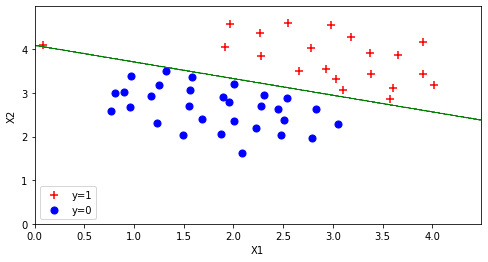

In [31]:
## add desicion boundary plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(class_1['X1'], class_1['X2'], label='y=1', s=50, marker='+', c='r')
ax.scatter(class_0['X1'], class_0['X2'], label='y=0', s=50, marker='o', c='b')
ax.legend(loc='lower left')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

x1 = np.arange(0, 4.5, 0.01)
x2 = np.arange(0, 5, 0.01)
x1, x2 = np.meshgrid(x1, x2) 
y_pred = np.array([svm_2.predict(np.vstack((a, b)).T) for (a, b) in zip(x1, x2)])  # ".predict"
plt.contour(x1, x2, y_pred, colors='g', linewidths=.5)    # 决策边界, 使用等高线表示

plt.show()

In [32]:
svm_2.decision_function(df_1[['X1', 'X2']])  #样本到分类超平面的距离

array([  9.9625487 ,   5.03269843,  12.80804819,   4.58500706,
         0.99991656,   5.02804987,   4.97496852,  12.54886915,
         8.04690945,  11.91651628,   8.77667398,   1.27456619,
         5.49599436,   9.07961021,   3.33472281,  11.23599543,
         9.32840282,   6.58986376,   3.19275624,   3.02319317,
        -1.07355908,  -1.        ,  -4.52279261,  -4.11082496,
        -2.04536962,  -3.07807038,  -5.10537244,  -8.86659799,
        -6.02042158, -10.56469441,  -7.77507801, -10.40742802,
        -3.63655942,  -3.43023713,  -6.48547059,  -8.35027452,
       -11.96747568,  -8.35807022,  -5.76710121,  -6.28420924,
        -2.69028755,  -3.39841806,  -0.65744901,  -8.33327546,
        -4.15507512,  -8.49047486, -13.40757612,  -1.91518354,
        -5.83889405,  -9.68963701,   0.32115014])

### 2. 高斯kernel

In [33]:
data_2=sio.loadmat('/Users/yangguangqiang/Music/career-2021/ML-startup/吴恩达/ML-homework-main/ex6-SVM/data/ex6data2.mat')
data_x_2=data_2['X']
data_y_2=data_2['y']
df_2=pd.DataFrame(data_x_2,columns=['X1','X2'])  #build a dataframe to record data
df_2['Y']=data_y_2
df_2.head()

,X1,X2,Y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [36]:
min(df_2['X1']), max(df_2['X1']), min(df_2['X2']), max(df_2['X2'])

(0.0449309, 0.998848, 0.402632, 0.988596)

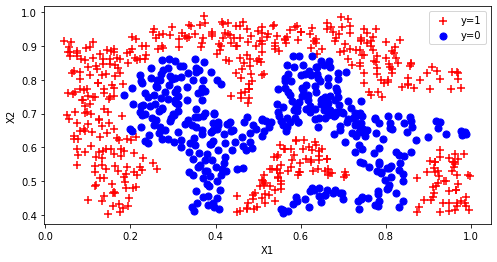

In [34]:
## visualize plot scatter
class_1=df_2[df_2["Y"]==1]
class_0=df_2[df_2["Y"]==0]

fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(class_1['X1'], class_1['X2'], label='y=1', s=50, marker='+', c='r')
ax.scatter(class_0['X1'], class_0['X2'], label='y=0', s=50, marker='o', c='b')
ax.legend(loc='best')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

In [35]:
# gamma= 0.5/sigma^2 gamma和sigma成反比，gamma越小即sigma越大，gaussian kernek越"胖"，模型越容易under fitting
# "rbf"---高斯kernel
svm_2 = sklearn.svm.SVC(C=100, kernel='rbf', gamma=10, probability=True) #set C=100 and gamma=10 
svm_2.fit(df_2[['X1', 'X2']], df_2['Y'])
svm_2.score(df_2[['X1', 'X2']], df_2['Y'])

0.9698725376593279

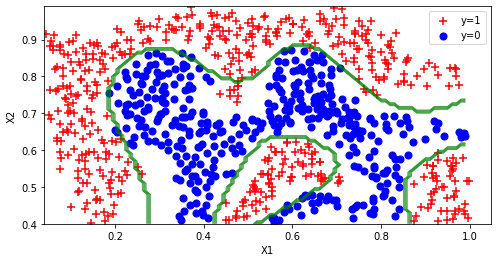

In [37]:
## visualize plot scatter
class_1=df_2[df_2["Y"]==1]
class_0=df_2[df_2["Y"]==0]

fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(class_1['X1'], class_1['X2'], label='y=1', s=50, marker='+', c='r')
ax.scatter(class_0['X1'], class_0['X2'], label='y=0', s=50, marker='o', c='b')
ax.legend(loc='best')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

x1 = np.arange(0.04, 1, 0.01)
x2 = np.arange(0.4, 1, 0.01)
x1, x2 = np.meshgrid(x1, x2) 
y_pred = np.array([svm_2.predict(np.vstack((a, b)).T) for (a, b) in zip(x1, x2)])  # ".predict"
plt.contour(x1, x2, y_pred, colors='g', linewidths=.5)    # 决策边界, 使用等高线表示

plt.show()

### 3. 通过CV 的效果，来改进 C 和 gamma的选择

In [39]:
data_3=sio.loadmat('/Users/yangguangqiang/Music/career-2021/ML-startup/吴恩达/ML-homework-main/ex6-SVM/data/ex6data3.mat')
df_train=pd.DataFrame(data_3['X'],columns=['X1','X2'])  #build a dataframe to record data
df_train['Y']=data_3['y']
df_train.head()

,X1,X2,Y
0,-0.158986,0.423977,1
1,-0.347926,0.470760,1
2,-0.504608,0.353801,1
3,-0.596774,0.114035,1
4,-0.518433,-0.172515,1


In [40]:
df_cv=pd.DataFrame(data_3['Xval'],columns=['X1','X2'])  #build a dataframe to record data
df_cv['Y']=data_3['yval']
df_cv.head()

,X1,X2,Y
0,-0.353062,-0.673902,0
1,-0.227126,0.447320,1
2,0.092898,-0.753524,0
3,0.148243,-0.718473,0
4,-0.001512,0.162928,0


In [42]:
select_list=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
combination=[(c,gamma) for c in select_list for gamma in select_list]

In [47]:
score_list=[]
for c,ga in combination:
    model=sklearn.svm.SVC(C=c, kernel='rbf', gamma=ga)
    model.fit(df_train[['X1', 'X2']], df_train['Y'])                 #用train的数据去算参数
    score_list.append(model.score(df_cv[['X1', 'X2']], df_cv['Y']))  #用CV的数据去算score

In [48]:
best_score=score_list[np.argmax(score_list)]
best_para=combination[np.argmax(score_list)]
print(best_score,best_para)

0.965 (3, 30)


In [49]:
best_model = sklearn.svm.SVC(C = best_para[0], gamma=best_para[1])
best_model.fit(df_train[['X1', 'X2']], df_train['Y'])
y_pred = best_model.predict(df_cv[['X1', 'X2']])

print(classification_report(df_cv['Y'], y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       113
           1       0.95      0.97      0.96        87

    accuracy                           0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200



### 3.2. 可以自动选择参数的包 GridSearchCV

In [52]:
parameters = {'C': select_list, 'gamma': select_list}
model = sklearn.svm.SVC()
svm_model = sklearn.model_selection.GridSearchCV(model, parameters, n_jobs=-1)
svm_model.fit(df_train[['X1', 'X2']], df_train['Y'])
print(svm_model.best_params_)

{'C': 30, 'gamma': 3}


In [53]:
df_all= pd.concat([df_train, df_cv], axis=0, ignore_index=True)
df_all.head()

,X1,X2,Y
0,-0.158986,0.423977,1
1,-0.347926,0.470760,1
2,-0.504608,0.353801,1
3,-0.596774,0.114035,1
4,-0.518433,-0.172515,1


In [54]:
para= {'C': select_list, 'gamma': select_list}
model2 = sklearn.svm.SVC()
svm_model = sklearn.model_selection.GridSearchCV(model2, para, n_jobs=-1)
svm_model.fit(df_all[['X1', 'X2']], df_all['Y'])
print(svm_model.best_params_)

{'C': 1, 'gamma': 10}


### 4. 垃圾邮件分类

In [76]:
data_train=sio.loadmat('/Users/yangguangqiang/Music/career-2021/ML-startup/吴恩达/ML-homework-main/ex6-SVM/data/spamTrain.mat')
train_x=data_train['X']
train_y=data_train['y'].ravel()
data_test=sio.loadmat('/Users/yangguangqiang/Music/career-2021/ML-startup/吴恩达/ML-homework-main/ex6-SVM/data/spamTest.mat')
test_x=data_test['Xtest']
test_y=data_test['ytest'].ravel()

In [77]:
model_mail = sklearn.svm.SVC()
model_mail.fit(train_x,train_y)
model_mail.score(test_x,test_y)

0.987

In [78]:
pred = model_mail.predict(test_x)
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       692
           1       0.99      0.97      0.98       308

    accuracy                           0.99      1000
   macro avg       0.99      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000

